## Importación de las librerías 

In [1]:
import utils
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

## Conjuntos de entrenamiento y test y CV controller

In [2]:
X_train, X_test, y_train, y_test = utils.get_train_test_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7776, 12) (1022, 12) (7776,) (1022,)


In [3]:
cv = utils.get_stratified_shuffle_cv()
print(cv)

StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8)


## Carga del mejor árbol de clasificación

Este será el árbol que se empleará para realizar el **gradient boosting**

In [4]:
decision_tree_model = pickle.load(open('/kaggle/input/decision-tree-model/decision_tree_model.sav', 'rb'))
print(decision_tree_model.criterion)
decision_tree_model

gini


DecisionTreeClassifier(max_depth=20, min_samples_leaf=14, min_samples_split=41,
                       random_state=99)

## Búsqueda del parámetro learning_rate del gradient boosting

In [14]:
param_grid = {
    'n_estimators': list(range(100,501,50)),
    'learning_rate': [0.1, 0.05, 0.03, 0.01, 0.005, 0.001]
}

grid_search_cv = GridSearchCV(
    GradientBoostingClassifier(max_depth=20, min_samples_leaf=14, min_samples_split=41, random_state=99),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=2, n_jobs=-1 # no tiene sentido (borrarlo)
)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=GradientBoostingClassifier(max_depth=20,
                                                  min_samples_leaf=14,
                                                  min_samples_split=41,
                                                  random_state=99),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.03, 0.01, 0.005, 0.001],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='roc_auc', verbose=2)

Seleccionamos el valor del **learning rate** como 0.03

<AxesSubplot:xlabel='estimators', ylabel='mean_test_score'>

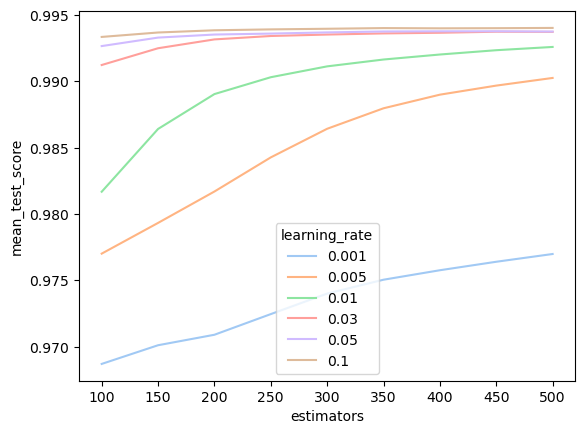

In [23]:
estimators_list = list(grid_search_cv.cv_results_['param_n_estimators'].data)
learning_rate_list = list(grid_search_cv.cv_results_['param_learning_rate'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
gradient_boosting_df = pd.DataFrame(list(zip(estimators_list, learning_rate_list, mean_test_score_list)), columns=['estimators', 'learning_rate', 'mean_test_score'])
sns.lineplot(data=gradient_boosting_df, x="estimators", y="mean_test_score", hue="learning_rate", legend="full", palette="pastel")

In [18]:
gradient_boosting_df.sort_values(['learning_rate', 'estimators', 'mean_test_score'])[['learning_rate', 'estimators', 'mean_test_score']]

,learning_rate,estimators,mean_test_score
45,0.001,100,0.968713
46,0.001,150,0.970121
47,0.001,200,0.970911
48,0.001,250,0.972468
49,0.001,300,0.974014
50,0.001,350,0.975059
51,0.001,400,0.975773
52,0.001,450,0.976411
53,0.001,500,0.976996
36,0.005,100,0.977024


## Búsqueda del parámetro n_estimators del gradient boosting

Llegaremos hasta 500 ya que a partir de alli no hay mejora significativa

In [29]:
param_grid = {
    'n_estimators': list(range(10,500,20)),
}

grid_search_cv = GridSearchCV(
    GradientBoostingClassifier(max_depth=20, min_samples_leaf=14, min_samples_split=41, learning_rate=0.03, random_state=99),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=2
)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ....................................n_estimators=10; total time=   0.3s
[CV] END ....................................n_estimators=10; total time=   0.3s
[CV] END ....................................n_estimators=10; total time=   0.3s
[CV] END ....................................n_estimators=10; total time=   0.3s
[CV] END ....................................n_estimators=10; total time=   0.3s
[CV] END ....................................n_estimators=30; total time=   1.0s
[CV] END ....................................n_estimators=30; total time=   1.0s
[CV] END ....................................n_estimators=30; total time=   1.0s
[CV] END ....................................n_estimators=30; total time=   1.0s
[CV] END ....................................n_estimators=30; total time=   1.0s
[CV] END ....................................n_estimators=50; total time=   1.8s
[CV] END ....................................n_

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=GradientBoostingClassifier(learning_rate=0.03,
                                                  max_depth=20,
                                                  min_samples_leaf=14,
                                                  min_samples_split=41,
                                                  random_state=99),
             param_grid={'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150,
                                          170, 190, 210, 230, 250, 270, 290,
                                          310, 330, 350, 370, 390, 410, 430,
                                          450, 470, 490]},
             scoring='roc_auc', verbose=2)

Decidimos que el número de árboles a usar será: **10** ya que la mejora desde allí es insignificativa, además es un modelo menos sobrejustado

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  


<AxesSubplot:xlabel='estimators', ylabel='mean_test_score'>

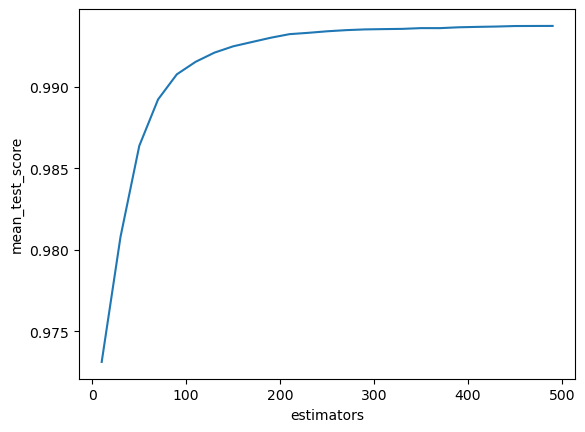

In [38]:
estimators_list = list(grid_search_cv.cv_results_['param_n_estimators'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
gradient_boosting_df = pd.DataFrame(list(zip(estimators_list, mean_test_score_list)), columns=['estimators', 'mean_test_score'])
gradient_boosting_df['mean_test_score_shift'] = gradient_boosting_df['mean_test_score'].shift().fillna(0)
gradient_boosting_df['diff'] = (gradient_boosting_df['mean_test_score'] - gradient_boosting_df['mean_test_score_shift'])
sns.lineplot(data=gradient_boosting_df, x="estimators", y="mean_test_score", legend="full", palette="pastel")

In [39]:
gradient_boosting_df

,estimators,mean_test_score,mean_test_score_shift,diff
0,10,0.973126,0.000000,0.973126
1,30,0.980796,0.973126,0.007671
2,50,0.986390,0.980796,0.005593
3,70,0.989241,0.986390,0.002851
4,90,0.990782,0.989241,0.001541
5,110,0.991551,0.990782,0.000769
6,130,0.992113,0.991551,0.000562
7,150,0.992501,0.992113,0.000389
8,170,0.992766,0.992501,0.000264
9,190,0.993028,0.992766,0.000263


**Modelo de gradient boosting**

Confusion matrix, without normalization
[[884  88]
 [ 36  14]]


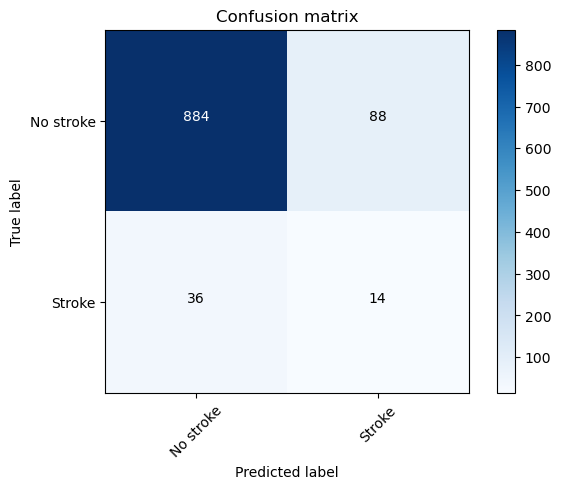

In [60]:
gradient_boosting_model = GradientBoostingClassifier(
    max_depth=20, min_samples_leaf=14, min_samples_split=41,
    learning_rate=0.03, n_estimators=10, random_state=99
)

gradient_boosting_model.fit(X_train, y_train)
y_pred = gradient_boosting_model.predict(X_test)

cm = utils.get_confusion_matrix(y_test, y_pred)
utils.plot_confusion_matrix(cm=cm, classes=['No stroke', 'Stroke'])

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.14      0.28      0.18        50

    accuracy                           0.88      1022
   macro avg       0.55      0.59      0.56      1022
weighted avg       0.92      0.88      0.90      1022



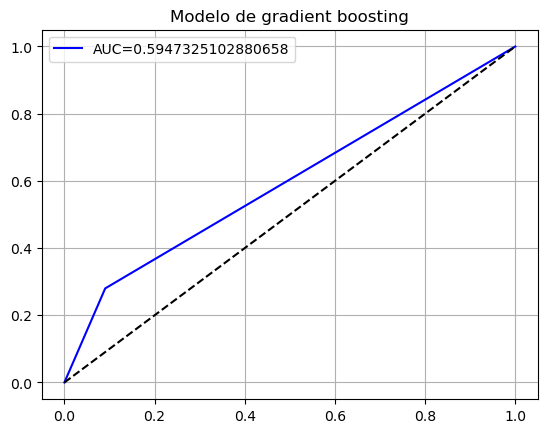

In [61]:
utils.print_metrics(y_test, y_pred, "Modelo de gradient boosting")

## Importancia de las variables

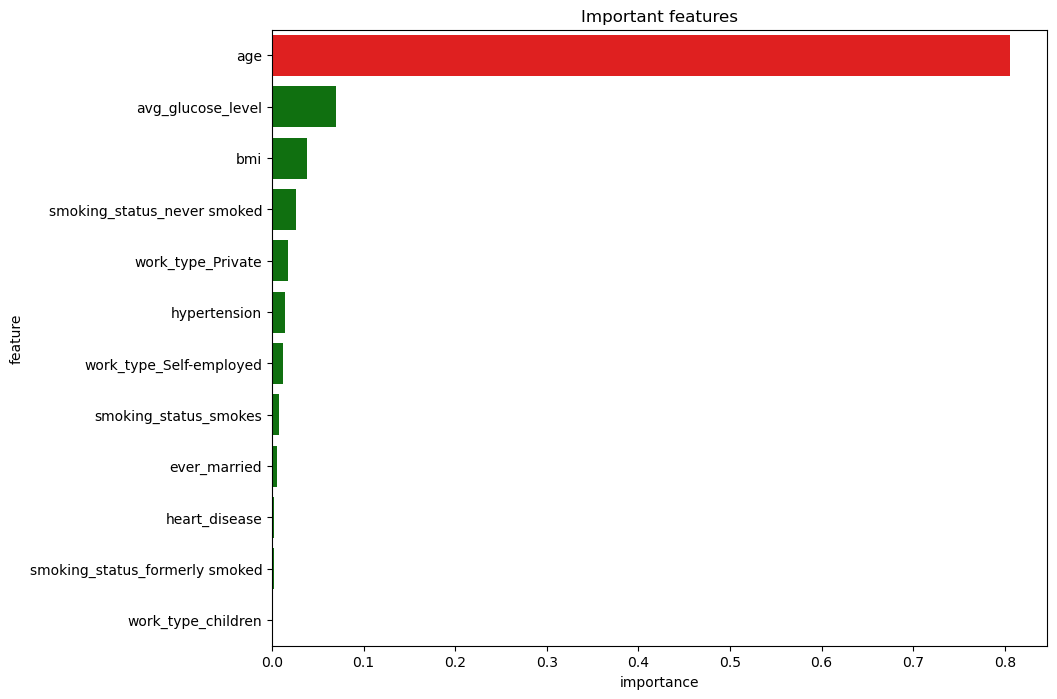

In [62]:
utils.plot_tree_feature_importance(gradient_boosting_model.feature_names_in_, gradient_boosting_model.feature_importances_)

**Guardamos el modelo para la comparativa final**

In [63]:
pickle.dump(gradient_boosting_model, open("gradient_boosting_model.sav", 'wb'))